---
### Análisis del índice S&P 500


El 4 de marzo de 1957, fue creado el índice accionario **Standard & Poor’s 500**. El índice S&P 500 se ha vuelto sinónimo del término “mercado de acciones estadounidense”. Es uno de los principales referentes para el mercado, pese a que otros, incluyendo los índices Russell y Wilshire, son mediciones más amplias del mercado.

Las 500 compañías presentes en el S&P representan al mercado estadounidense en forma más amplia que el promedio industrial Dow Jones, que incluye las acciones de sólo 30 compañías.

---

---
### Zona de imports

---

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# https://analyzingalpha.com/yfinance-python

---
### Testemos Yfinance

Descargamos los datos de google

---

In [3]:
goog = yf.Ticker('goog')
data = goog.history()
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-20 00:00:00-04:00,101.059998,102.580002,100.790001,101.930000,26033900,0.0,0.0
2023-03-21 00:00:00-04:00,101.980003,105.959999,101.860001,105.839996,33122800,0.0,0.0
2023-03-22 00:00:00-04:00,105.139999,107.510002,104.209999,104.220001,32336900,0.0,0.0
2023-03-23 00:00:00-04:00,105.889999,107.100998,105.410004,106.260002,31385800,0.0,0.0
2023-03-24 00:00:00-04:00,105.739998,106.160004,104.739998,106.059998,25236200,0.0,0.0


---
### Ploteamos la evolucion de google durante el tiempo

---

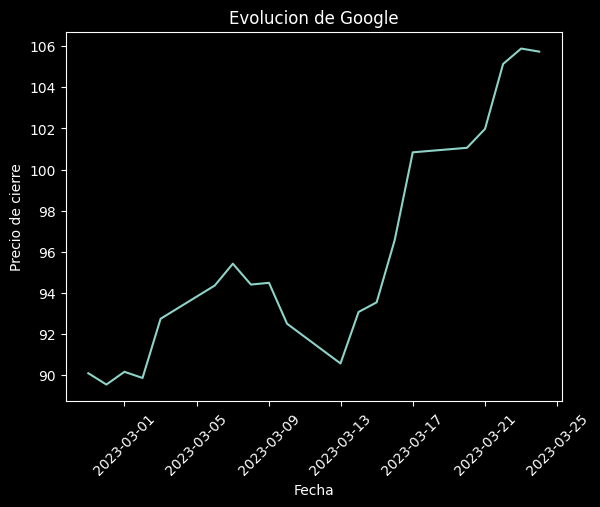

In [4]:
fig, ax = plt.subplots()
sns.lineplot(x="Date", y="Open", data=data)
ax.tick_params(axis='x', labelrotation=45)
ax.set(title="Evolucion de Google", ylabel="Precio de cierre", xlabel='Fecha')
plt.show()

---
### Obtenemos la lista de compañias que forman **actualmente** parte del sp500

---

In [6]:
import os 

path = './data/'
isExist = os.path.exists(path+'sp500list.csv')

want_save = True

if isExist:
    sp500 = pd.read_csv('./data/sp500list.csv')
else:
    url =  'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    sp500_all = pd.read_html(url)
    sp500 = sp500_all[0]
    sp500["Symbol"]= sp500["Symbol"].map(lambda x: x.replace(".","-")).unique().tolist()
    if want_save:
        # Save
        isExist2 = os.path.exists(path)
        if not isExist2:
            os.makedirs(path)
        sp500.to_csv(path+'sp500list.csv', index=False)
    

sp500.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


---
### Desde yfinance, obtenemos los datos de SPY

> Spy: es un TRUST ETF que replica la evolución del índice SP500

---

In [7]:
spy_by_month = yf.download('SPY', period = "23y")
spy_by_day = yf.download('SPY', period = "23y",interval = "1d")

spy_by_month.to_csv('./data/SPY.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


---
### Agregamos la columna date (sin perder el indice, que tambien es date)

---

In [ ]:
spy_by_day.reset_index(inplace=True)
spy_by_day["d"] = spy_by_day["Date"].copy()
spy_by_day.rename(columns={"d":"Date", "Date":"d"},inplace=True)
spy_by_day.set_index("Date", inplace=True)
spy_by_day.rename(columns={"d":"Date"}, inplace=True)
print(spy_by_day.head())

# -----------------------------------------------------------------------
spy_by_month.reset_index(inplace=True)
spy_by_month["d"] = spy_by_month["Date"].copy()
spy_by_month.rename(columns={"d":"Date", "Date":"d"},inplace=True)
spy_by_month.set_index("Date", inplace=True)
spy_by_month.rename(columns={"d":"Date"}, inplace=True)
print(spy_by_month.head())

In [10]:
spy_by_day.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-03-27,2000-03-27,153.37500,153.781250,151.81250,151.93750,99.441963,8798600
2000-03-28,2000-03-28,151.25000,152.984375,150.59375,151.06250,98.869270,6334400
2000-03-29,2000-03-29,151.56250,152.484375,149.65625,151.21875,98.971550,6747500
2000-03-30,2000-03-30,150.15625,151.921875,147.12500,148.68750,97.314842,9491900
2000-03-31,2000-03-31,149.62500,152.312500,148.43750,150.37500,98.419334,9249100


In [11]:
spy_by_month.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-03-27,2000-03-27,153.37500,153.781250,151.81250,151.93750,99.441963,8798600
2000-03-28,2000-03-28,151.25000,152.984375,150.59375,151.06250,98.869270,6334400
2000-03-29,2000-03-29,151.56250,152.484375,149.65625,151.21875,98.971550,6747500
2000-03-30,2000-03-30,150.15625,151.921875,147.12500,148.68750,97.314842,9491900
2000-03-31,2000-03-31,149.62500,152.312500,148.43750,150.37500,98.419334,9249100


---
### Ploteamos la evolucion del SPY
* Período en meses
* Período en días

---

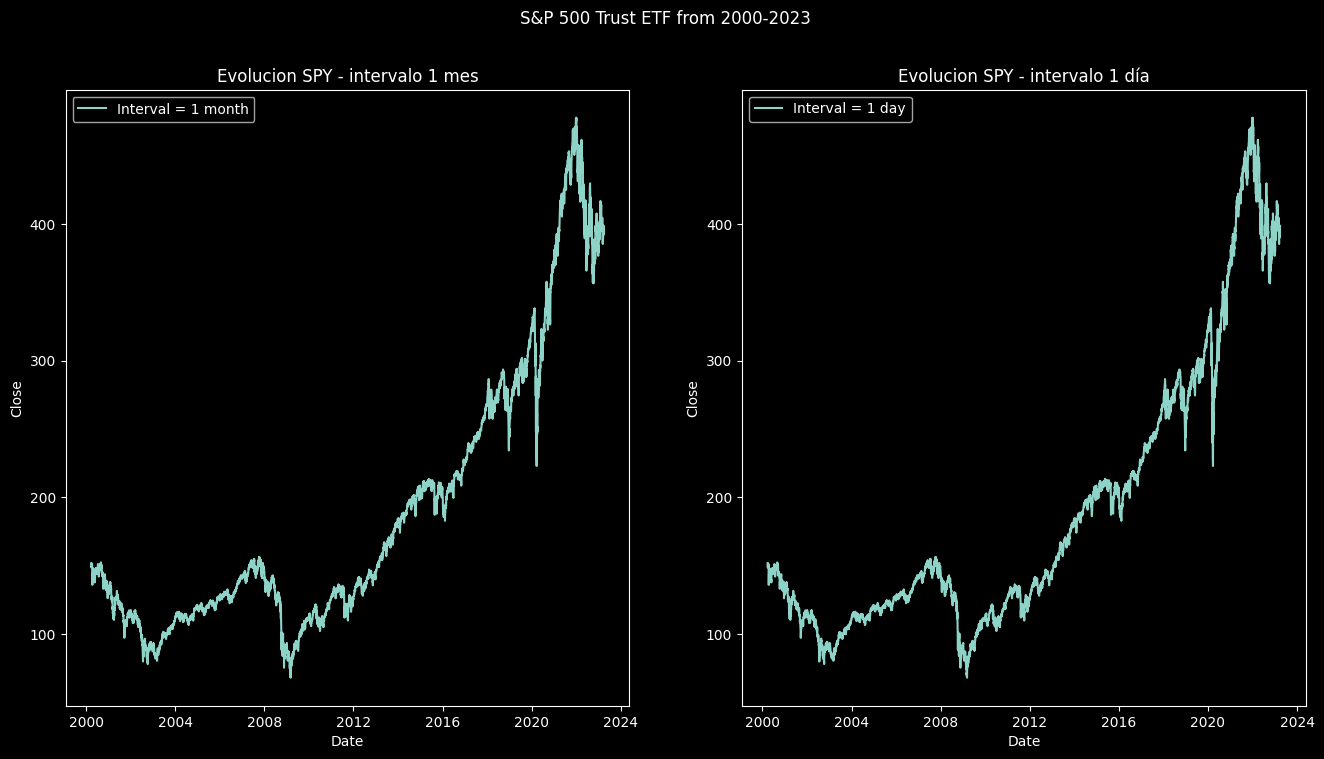

In [13]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.lineplot(ax=ax[0], x="Date", y="Close", data=spy_by_month, label="Interval = 1 month")
sns.lineplot(ax=ax[1],x="Date", y="Close", data=spy_by_day, label="Interval = 1 day")
ax[0].set(title="Evolucion SPY - intervalo 1 mes")
ax[1].set(title="Evolucion SPY - intervalo 1 día")
plt.suptitle("S&P 500 Trust ETF from 2000-2023")
plt.show()

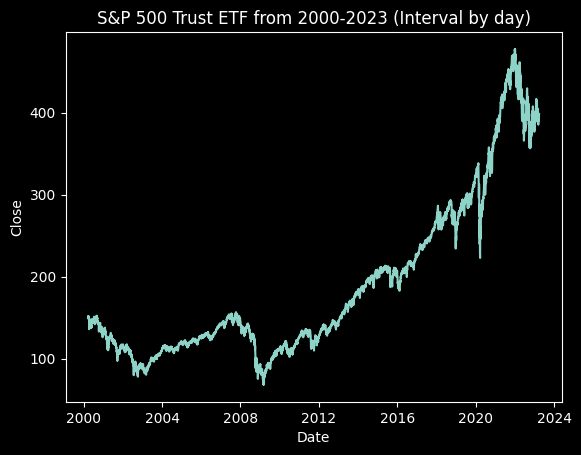

In [14]:
sns.lineplot(x="Date", y="Close", data=spy_by_day)
plt.title("S&P 500 Trust ETF from 2000-2023 (Interval by day)")
plt.show()


---
### Analisis del índice en algunas de las mayores crisis economicas

---
### Dot com bubble (Burbuja de las punto com)

> La burbuja de las punto com (o el auge de las punto com) fue una burbuja en el mercado de valores a finales de los años 90. El período coincidió con el gran crecimiento en la adopción de Internet, una proliferación de capital de riesgo disponible y el rápido crecimiento de las valoraciones en nuevas empresas punto com.

> Entre 1995 y su punto máximo en marzo de 2000, el índice bursátil Nasdaq Composite subió un 800%, solo para caer un 78% desde su pico en octubre de 2002, perdiendo todas sus ganancias durante la burbuja.

> Durante el colapso de las punto com, muchas empresas de compras en línea, notablemente Pets.com, Webvan y Boo.com, así como varias empresas de comunicación, como Worldcom, NorthPoint Communications y Global Crossing, fracasaron y cerraron. Otras, como Lastminute.com, MP3.com y PeopleSound, sobrevivieron a la explosión pero fueron adquiridas. Empresas más grandes como Amazon y Cisco Systems perdieron grandes porciones de su capitalización de mercado, con Cisco perdiendo el 80% de su valor de mercado.

---


In [15]:
dot_com_bubble = spy_by_day['2000-01-01':'2004-01-01']
dot_com_bubble.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-03-27,2000-03-27,153.37500,153.781250,151.81250,151.93750,99.441963,8798600
2000-03-28,2000-03-28,151.25000,152.984375,150.59375,151.06250,98.869270,6334400
2000-03-29,2000-03-29,151.56250,152.484375,149.65625,151.21875,98.971550,6747500
2000-03-30,2000-03-30,150.15625,151.921875,147.12500,148.68750,97.314842,9491900
2000-03-31,2000-03-31,149.62500,152.312500,148.43750,150.37500,98.419334,9249100


---
#### En que fecha el sp500 toco el mínimo?
Cuando comenzó la caida, y se entró en lo que se conoce como mercado bajista (o bear market), el índice tocó su punto mínimo en **Octubre de 2002**.

---

In [17]:
min_date = dot_com_bubble.loc[dot_com_bubble['Close'].idxmin(), 'Date']
print("Fecha durante crisis dot com en que SP500 toco el valor minimo --> ",min_date.strftime("%Y-%m-%d"))

Fecha durante crisis dot com en que SP500 toco el valor minimo -->  2002-10-09


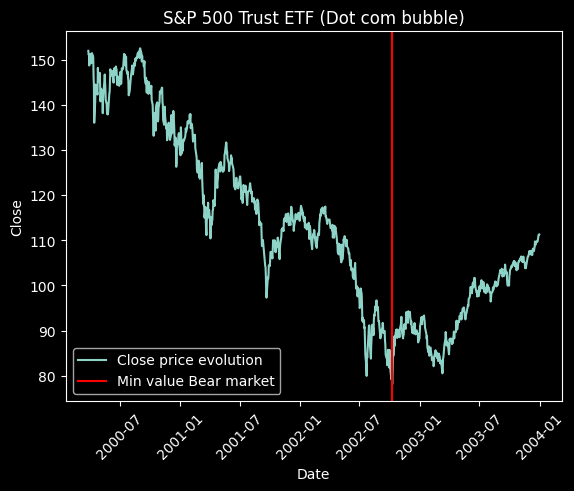

In [20]:
fig, ax = plt.subplots()
sns.lineplot(x="Date", y="Close", data=dot_com_bubble, label="Close price evolution", ax=ax)
ax.axvline(x=min_date, label="Min value Bear market", color='red')
plt.title("S&P 500 Trust ETF (Dot com bubble)")
ax.tick_params(axis='x', labelrotation=45)
plt.legend()
plt.show()

---
### Crisis (de las hipotecas) subprime

> La crisis de las hipotecas subprime fue una crisis financiera por desconfianza crediticia que se extendió inicialmente por los mercados financieros de Estados Unidos y fue la alarma que puso en el punto de mira a las hipotecas "basura" de Europa desde el verano del 2007, evidenciándose al verano siguiente con la crisis financiera de 2008. Generalmente, se considera el detonante de la Gran Recesión en el plano internacional, incluyendo la burbuja inmobiliaria en España.

> La crisis subprime, hasta octubre de 2008, se había saldado con numerosas quiebras financieras, nacionalizaciones bancarias, constantes intervenciones de los bancos centrales de las principales economías desarrolladas, profundos descensos en las cotizaciones bursátiles y un deterioro de la economía global real que ha supuesto la entrada en recesión de algunas de las economías más industrializadas.

---

### Caída muy notable: Lehman Brothers

Lehman Brothers Holdings Inc. (indicador de la NYSE: LEH; frecuentemente acortado a Lehman) fue una compañía global de servicios financieros de Estados Unidos fundada en 1850. Destacaba en banca de inversión, gestión de activos financieros e inversiones en renta fija, banca comercial, gestión de inversiones y servicios bancarios en general. Antes de declarar la quiebra el 15 de septiembre de 2008, Lehman Brothers era el cuarto banco de inversión más grande de Estados Unidos (detrás de Goldman Sachs, Morgan Stanley y Merrill Lynch) y tenía 680 mil millones de dólares estadounidenses en activos.2

El 15 de septiembre de 2008, Lehman Brothers presentó su declaración formal de quiebra tras el éxodo de la mayoría de sus clientes, pérdidas drásticas en el mercado de valores y la devaluación de sus activos por las principales agencias de calificación de riesgos.3​ Estos fenómenos se produjeron principalmente por el involucramiento de Lehman en la crisis de las hipotecas subprime, asumiendo riesgos excesivos. Posteriormente, se presentaron alegaciones de negligencia que incluso llegaron a acusaciones criminales.4​ La quiebra de Lehman Brothers es la mayor quiebra en la historia de Estados Unidos y está fuertemente asociada a la crisis financiera global de 2008.

---


In [22]:
subprime_bubble = spy_by_day['2006-01-01':'2010-01-01']
min_date_sp = subprime_bubble.loc[subprime_bubble['Close'].idxmin(), 'Date']
max_date_sp = subprime_bubble.loc[subprime_bubble['Close'].idxmax(), 'Date']

print("Fecha del máximo antes de que explotara la crisis --> ",max_date_sp.strftime("%Y-%m-%d"))
print("Fecha en la que el índice toca su mínimo durante la crisis --> ",min_date_sp.strftime("%Y-%m-%d"))


Fecha del máximo antes de que explotara la crisis -->  2007-10-09
Fecha en la que el índice toca su mínimo durante la crisis -->  2009-03-09


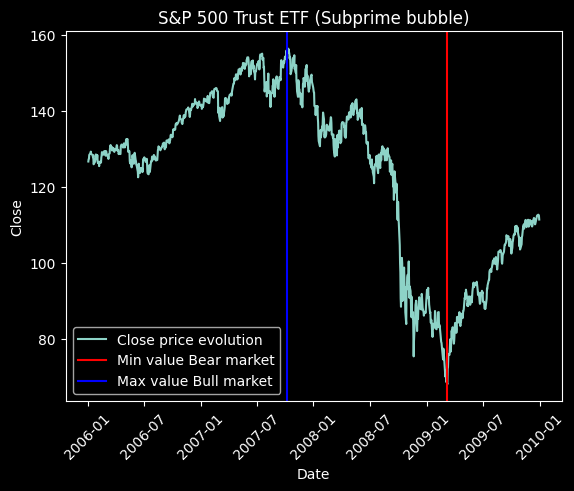

In [24]:
fig, ax = plt.subplots()
g = sns.lineplot(x="Date", y="Close", data=subprime_bubble, label="Close price evolution", ax=ax)
ax.axvline(x=min_date_sp, label="Min value Bear market", color='red')
plt.axvline(x=max_date_sp, label="Max value Bull market", color='blue')
plt.title("S&P 500 Trust ETF (Subprime bubble)")
ax.legend()
ax.tick_params(axis='x', labelrotation=45)

plt.show()

---
### Crisis por la pandemia de Covid

---

In [25]:
sep = "--------------------------------------------------------------------------------"

In [28]:
covid_pandemic = spy_by_day['2019-01-01':'2022-01-01']
pre_covid = spy_by_day['2018-01-01':'2019-12-31']


min_date_covid = covid_pandemic.loc[covid_pandemic['Close'].idxmin(), 'Date']
max_date_covid = covid_pandemic.loc[covid_pandemic['Close'].idxmax(), 'Date']

min_price_covid = covid_pandemic['Close'].min()
max_price_covid = covid_pandemic['Close'].max()
print(sep)
print("Fecha en que el índice toco su mínimo durante la pandemia --> ",min_date_covid.strftime("%Y-%m-%d"))
print("Fecha del máximo superada la pandemia --> ",max_date_covid.strftime("%Y-%m-%d"))
print("Precio mínimo (del SPY) durante la pandemia --> ",round(min_price_covid,2))
print("Precio máximo (del SPY) durante la pandemia --> ", round(max_price_covid,2))
print(sep)


max_date_pre_covid = pre_covid.loc[pre_covid['Close'].idxmax(), 'Date']
max_price_pre_covid = pre_covid['Close'].max()
print("Precio máximo (SPY), pre-pandemia --> ", round(max_price_pre_covid,2))
print(sep)
print("Delta variation (price loss) --> ", round(min_price_covid-max_price_pre_covid,2))
print("Delta variation % (price loss) --> ", round(100*(min_price_covid-max_price_pre_covid)/max_price_pre_covid, 2))

--------------------------------------------------------------------------------
Fecha en que el índice toco su mínimo durante la pandemia -->  2020-03-23
Fecha del máximo superada la pandemia -->  2021-12-29
Precio mínimo (del SPY) durante la pandemia -->  222.95
Precio máximo (del SPY) durante la pandemia -->  477.48
--------------------------------------------------------------------------------
Precio máximo (SPY), pre-pandemia -->  322.94
--------------------------------------------------------------------------------
Delta variation (price loss) -->  -99.99
Delta variation % (price loss) -->  -30.96


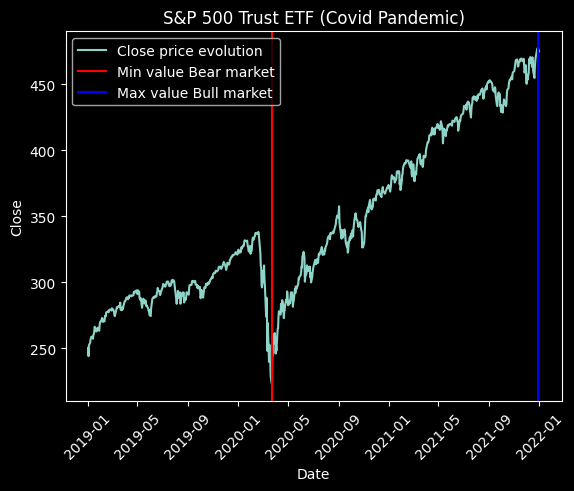

In [30]:
fig, ax = plt.subplots()
g = sns.lineplot(x="Date", y="Close", data=covid_pandemic, label="Close price evolution", ax=ax)
ax.axvline(x=min_date_covid, label="Min value Bear market", color='red')
plt.axvline(x=max_date_covid, label="Max value Bull market", color='blue')
plt.title("S&P 500 Trust ETF (Covid Pandemic)")
ax.tick_params(axis='x', labelrotation=45)
plt.legend()

plt.show()


---

### Graficando las 3 crisis todas juntas queda:

---


Es posible observar una gran caida en torno a las fechas en que se decreto pandemia a nivel mundial, seguida de un Bull market (o mercado alcista) que termina en 2021.

Luego del pico en 2021, arranca un bear market debido a la desconfianza por la suba de tasas por parte de la FED y el incremento a nivel mundial de la inflación.

---


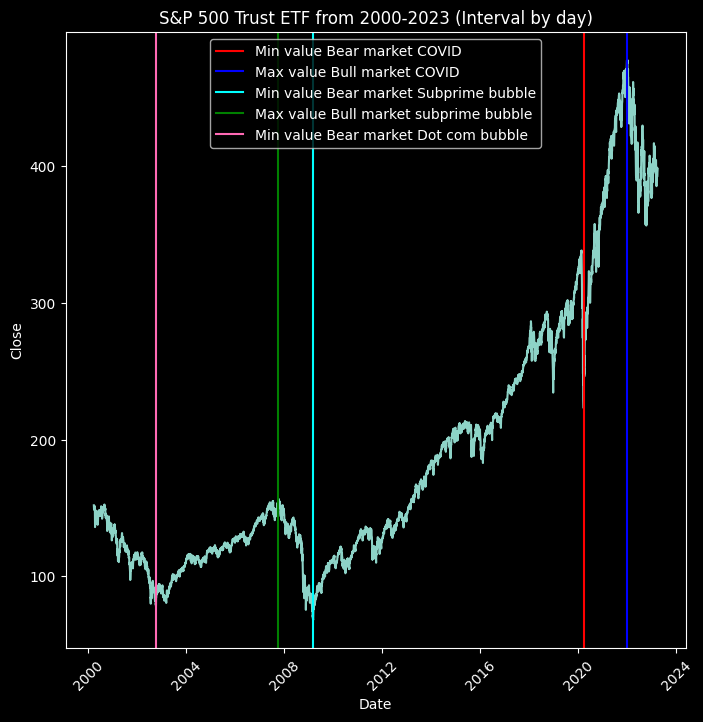

In [31]:
fig, ax = plt.subplots(figsize=(8,8))
g = sns.lineplot(x="Date", y="Close", data=spy_by_day, ax=ax)
plt.title("S&P 500 Trust ETF from 2000-2023 (Interval by day)")

ax.axvline(x=min_date_covid, label="Min value Bear market COVID", color='red')
ax.axvline(x=max_date_covid, label="Max value Bull market COVID", color='blue')
ax.axvline(x=min_date_sp, label="Min value Bear market Subprime bubble", color='cyan')
ax.axvline(x=max_date_sp, label="Max value Bull market subprime bubble", color='green')
ax.axvline(x=min_date, label="Min value Bear market Dot com bubble", color='hotpink')
ax.tick_params(axis='x', labelrotation=45)
ax.legend()
plt.show()

---
### Análisis comparativo del SP500, con cada uno de los sectores que lo componen

---

In [34]:
sector = sp500['GICS Sector'].unique().tolist()

print("---------------------------------------------")
print("Sectores que componen el SP500")
print("---------------------------------------------")
for s in sector:
    print(" * ",s)
print("---------------------------------------------")

---------------------------------------------
Sectores que componen el SP500
---------------------------------------------
 *  Industrials
 *  Health Care
 *  Information Technology
 *  Communication Services
 *  Consumer Staples
 *  Consumer Discretionary
 *  Utilities
 *  Financials
 *  Materials
 *  Real Estate
 *  Energy
---------------------------------------------


---
### Compañias por sector
(las agrego en un diccionario, son mas de 500 😲)

---


In [36]:
companies_by_sector = {}
for s in sector:
    companies_by_sector[s] = list(sp500.loc[sp500['GICS Sector'] == s, 'Symbol'])



---
### Necesito los precios de cada uno de las empresas para poder hacer un analisis comparativo

#### Descargo los datos con un intervalo de tiempo de 1 mes, porque sino es demasiada data

---

In [37]:
# Obtengo todos los tickers de las empresas
tickers = sp500["Symbol"].map(lambda x: x.replace(".","-")).unique().tolist()

In [38]:
import datetime as dt

data = {}
for symbol in tickers:
    data[symbol] = yf.download(symbol, start="2000-01-01", end=dt.datetime.now(), interval="1mo")["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

---
### Convertimos el diccionario en un dataframe
Cada columna es una empresa. El índice son las fechas desde el 2000-01-01 hasta el 2023-03-27 (dia de la ultima actualización de esta notebook)

---

In [88]:
df = pd.DataFrame(data)

In [89]:
df.shape

(279, 503)

In [91]:
df.head()

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,25.322666,2.167871,8.578849,NaN,NaN,1.154392,6.450450,13.668242,23.123604,NaN,...,NaN,32.053314,NaN,7.331475,NaN,3.659601,26.305555,NaN,40.120422,NaN
2000-02-01,23.851990,1.904371,8.736851,NaN,NaN,0.937367,5.524057,25.319603,21.234718,NaN,...,NaN,28.626482,NaN,6.688780,NaN,3.403908,29.583332,NaN,36.202606,NaN
2000-03-01,24.108566,1.987170,9.316000,NaN,NaN,0.891191,5.684990,27.631262,23.519651,NaN,...,NaN,36.396900,NaN,7.569510,NaN,3.971226,22.222221,NaN,28.399221,NaN
2000-04-01,23.581133,2.270065,10.176449,NaN,NaN,0.461757,5.478262,30.027847,26.284298,NaN,...,NaN,29.100761,NaN,8.307416,NaN,4.330795,25.333332,NaN,28.313927,NaN
2000-05-01,23.342951,2.333004,10.826182,NaN,NaN,0.457139,6.580804,27.948406,26.864332,NaN,...,NaN,26.794497,NaN,8.576016,NaN,3.747496,21.333332,NaN,31.810535,NaN


---
### Guardamos el dataset en un csv

---

In [42]:
df.to_csv('./data/tk502_v2.csv')

---
#### Ahora ya tenemos todo para trabajar con las estadisticas por sectores

---

In [43]:
# Por las dudas, cargamos todo nuevamente
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/tk502_v2.csv')
companies = pd.read_csv('./data/sp500list.csv')
spy = pd.read_csv('./data/SPY.csv')
sector = companies['GICS Sector'].unique().tolist()

In [44]:
pd.options.mode.chained_assignment = None

In [45]:
print("spy.shape --> ", spy.shape)
print("spy.head() --> \n", spy.head())
spy_close = spy[["Date", "Close"]]
spy_close["Date"] =  pd.to_datetime(spy_close["Date"], format="%Y-%m-%d")    

spy.shape -->  (5787, 7)
spy.head() --> 
          Date       Open        High        Low      Close  Adj Close   Volume
0  2000-03-27  153.37500  153.781250  151.81250  151.93750  99.441963  8798600
1  2000-03-28  151.25000  152.984375  150.59375  151.06250  98.869270  6334400
2  2000-03-29  151.56250  152.484375  149.65625  151.21875  98.971550  6747500
3  2000-03-30  150.15625  151.921875  147.12500  148.68750  97.314842  9491900
4  2000-03-31  149.62500  152.312500  148.43750  150.37500  98.419334  9249100


---
### Tickers por sector

---


In [46]:
ticker_by_sector = {}

for s in sector:
    ticker_by_sector[s] = companies.loc[companies['GICS Sector']==s,'Symbol'].tolist()


In [47]:
print("---------------------------------------")
print("Cantidad de compañias por sector:")
print("---------------------------------------")
for s in sector:
    print(' *',s, " --> ", len(ticker_by_sector[s]))
print("---------------------------------------")

---------------------------------------
Cantidad de compañias por sector:
---------------------------------------
 * Industrials  -->  73
 * Health Care  -->  65
 * Information Technology  -->  66
 * Communication Services  -->  24
 * Consumer Staples  -->  37
 * Consumer Discretionary  -->  53
 * Utilities  -->  30
 * Financials  -->  73
 * Materials  -->  29
 * Real Estate  -->  30
 * Energy  -->  23
---------------------------------------


---
### Creamos un dataframe para cada sector, y calculamos la media de los precios, mes a mes

---


In [49]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

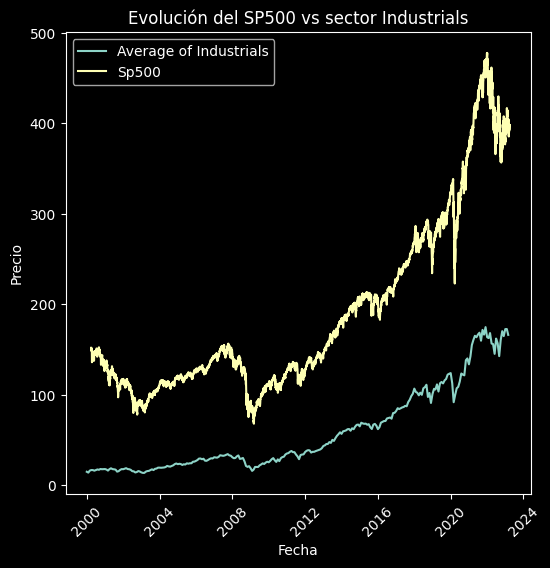

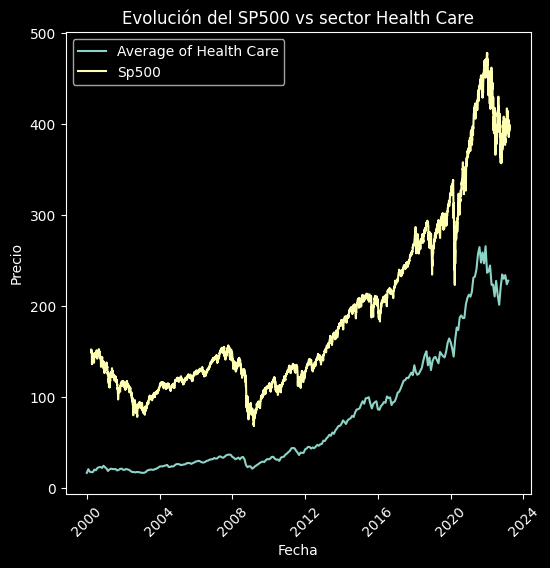

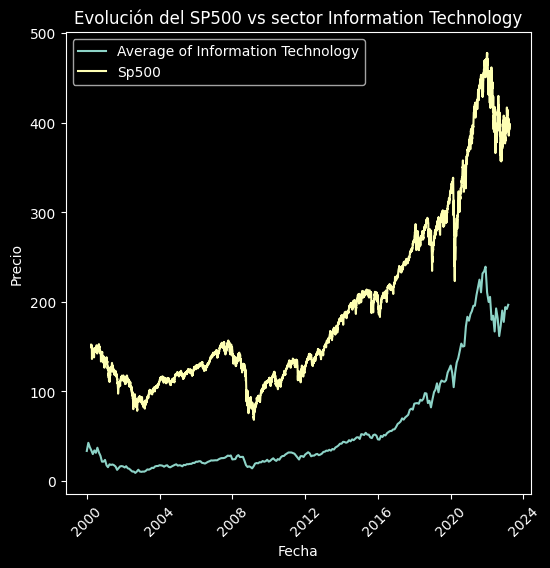

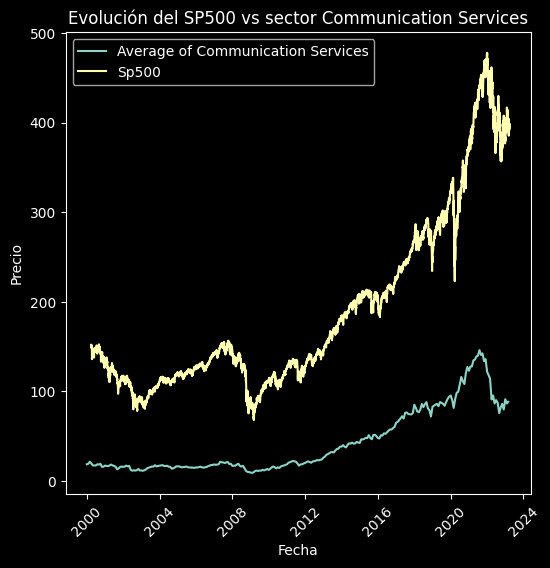

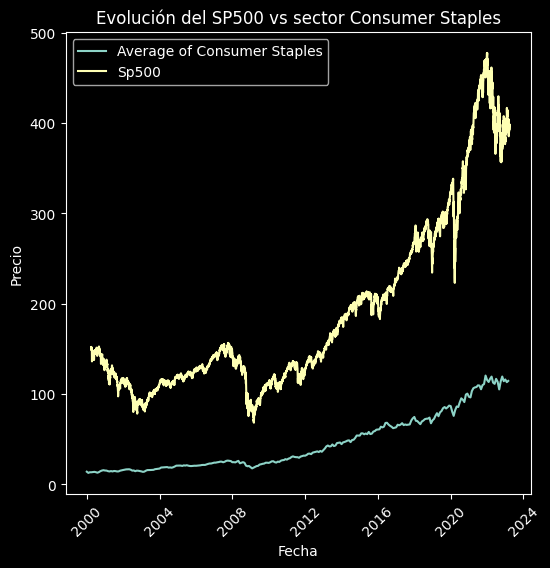

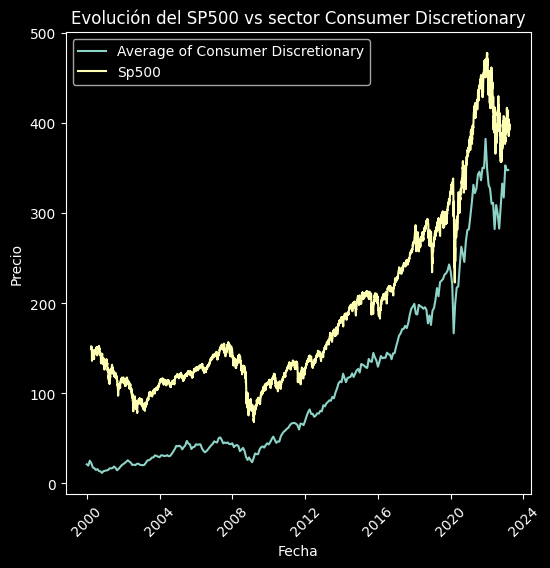

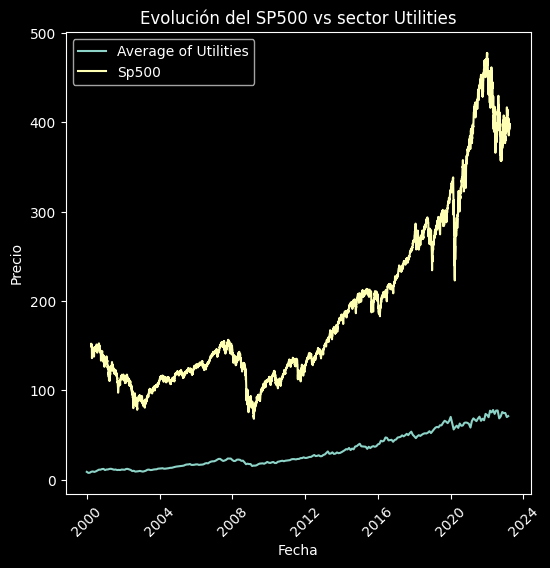

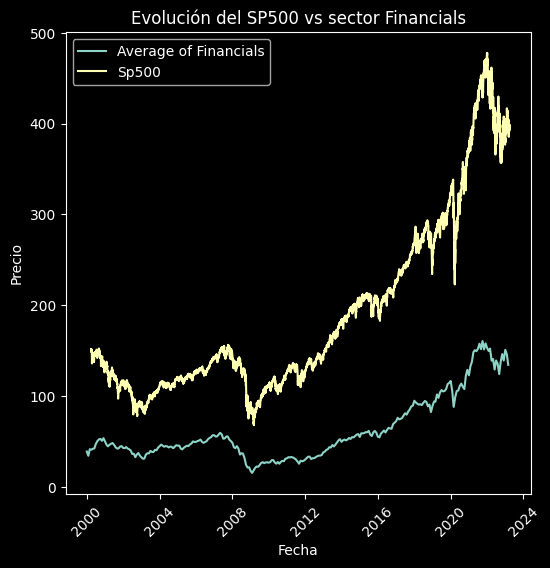

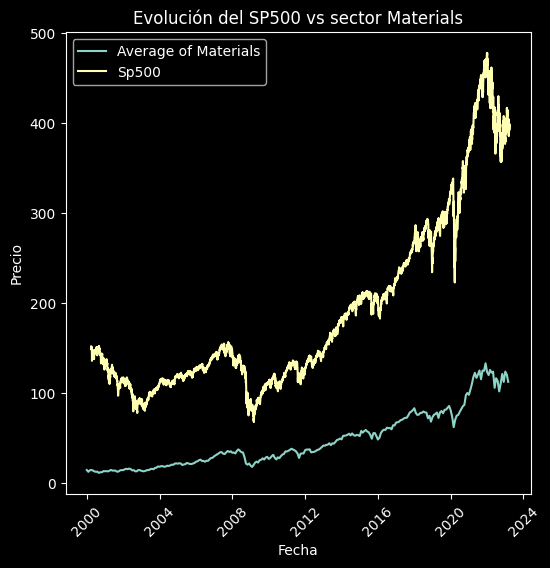

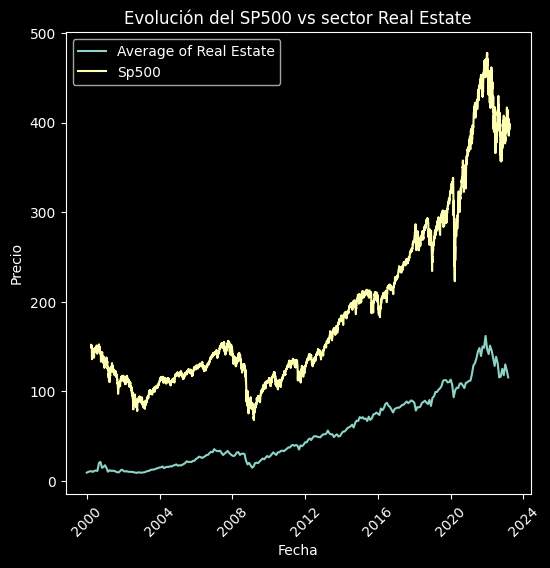

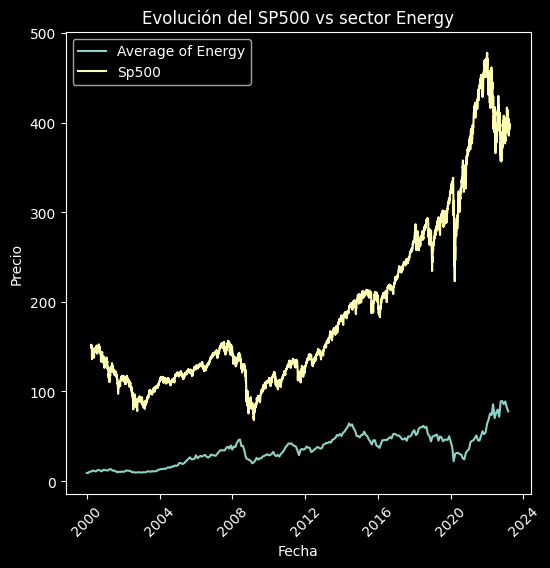

In [50]:
sector_dfs = {}

for s in sector:
    aus = df[ticker_by_sector[s]].copy()
    aus["Date"] = df["Date"]
    aus["Date"] =  pd.to_datetime(aus["Date"], format="%Y-%m-%d")  
    aus['mean'] = aus.iloc[:,1:].mean(axis=1)
    sector_dfs[s] = aus

for s in sector:
    fig, ax = plt.subplots(figsize=(6,6))
    sns.lineplot(x="Date", y="mean", data=sector_dfs[s],ax=ax, label="Average of "+s)
    sns.lineplot(x="Date", y="Close", data=spy_close, ax=ax, label="Sp500")
    ax.set(title="Evolución del SP500 vs sector "+s, xlabel="Fecha", ylabel="Precio")
    ax.tick_params(axis='x', labelrotation=45)
    plt.show()

---
### Sectores con comportamiento mas robusto frente a las crisis

Los sectores que mejor se han comportado durante las crisis descriptas son:
* Consumer Staples
* Utilities

Obviamente son sectores cuyo crecimiento es inferior a los otros sectores, pero presentan caidas menos abruptas e incluso leves incrementos cuando el resto de los sectores dentro del indice presentan caidas

---

---
### Vamos a analizar que compañias forman parte de estos sectores

---

In [68]:
tk_name = sp500[['Symbol', "Security"]]
tk_name.set_index('Symbol', inplace=True)
ticker_to_name =tk_name.sort_index()['Security']
ticker_to_name = ticker_to_name.to_dict()
ticker_to_name

{'A': 'Agilent Technologies',
 'AAL': 'American Airlines Group',
 'AAP': 'Advance Auto Parts',
 'AAPL': 'Apple Inc.',
 'ABBV': 'AbbVie',
 'ABC': 'AmerisourceBergen',
 'ABT': 'Abbott',
 'ACGL': 'Arch Capital Group',
 'ACN': 'Accenture',
 'ADBE': 'Adobe Inc.',
 'ADI': 'Analog Devices',
 'ADM': 'ADM',
 'ADP': 'ADP',
 'ADSK': 'Autodesk',
 'AEE': 'Ameren',
 'AEP': 'American Electric Power',
 'AES': 'AES Corporation',
 'AFL': 'Aflac',
 'AIG': 'American International Group',
 'AIZ': 'Assurant',
 'AJG': 'Arthur J. Gallagher & Co.',
 'AKAM': 'Akamai',
 'ALB': 'Albemarle Corporation',
 'ALGN': 'Align Technology',
 'ALK': 'Alaska Air Group',
 'ALL': 'Allstate',
 'ALLE': 'Allegion',
 'AMAT': 'Applied Materials',
 'AMCR': 'Amcor',
 'AMD': 'AMD',
 'AME': 'Ametek',
 'AMGN': 'Amgen',
 'AMP': 'Ameriprise Financial',
 'AMT': 'American Tower',
 'AMZN': 'Amazon',
 'ANET': 'Arista Networks',
 'ANSS': 'Ansys',
 'AON': 'Aon',
 'AOS': 'A. O. Smith',
 'APA': 'APA Corporation',
 'APD': 'Air Products and Chemica

In [62]:
sector1 = 'Consumer Staples'
sector2 = 'Utilities'

# Listas de compañias por sector (se indica el ticker)
sector1_companies_tk = ticker_by_sector[sector1]
sector2_companies_tk = ticker_by_sector[sector2]



In [71]:
sector1_companies_nm = {}
for tk in sector1_companies_tk:
    sector1_companies_nm[tk] = ticker_to_name[tk]


In [72]:
sector2_companies_nm = {}
for tk in sector2_companies_tk:
    sector2_companies_nm[tk] = ticker_to_name[tk]


In [73]:
print("----------------------------------------------------------")
print("Cantidad de compañias por sector elegido")
print("----------------------------------------------------------")
print(sector1," --> ", len(sector1_companies_tk))
print(sector2," --> ", len(sector2_companies_tk))
print("----------------------------------------------------------")

----------------------------------------------------------
Cantidad de compañias por sector elegido
----------------------------------------------------------
Consumer Staples  -->  37
Utilities  -->  30
----------------------------------------------------------


---
### Sector 1: Consumer Staples
Lista de empresas

---

In [78]:
print("----------------------------------------------------- ")
print("Sector: ", sector1)
print("----------------------------------------------------- ")
for s in sector1_companies_tk:
    print(s, " --> ", sector1_companies_nm[s])
print("----------------------------------------------------- ")

----------------------------------------------------- 
Sector:  Consumer Staples
----------------------------------------------------- 
ADM  -->  ADM
MO  -->  Altria
BF-B  -->  Brown–Forman
BG  -->  Bunge Limited
CPB  -->  Campbell Soup Company
CHD  -->  Church & Dwight
CLX  -->  Clorox
KO  -->  Coca-Cola Company (The)
CL  -->  Colgate-Palmolive
CAG  -->  Conagra Brands
STZ  -->  Constellation Brands
COST  -->  Costco
DG  -->  Dollar General
DLTR  -->  Dollar Tree
EL  -->  Estée Lauder Companies (The)
GIS  -->  General Mills
HSY  -->  Hershey's
HRL  -->  Hormel Foods
K  -->  Kellogg's
KDP  -->  Keurig Dr Pepper
KMB  -->  Kimberly-Clark
KHC  -->  Kraft Heinz
KR  -->  Kroger
LW  -->  Lamb Weston
MKC  -->  McCormick & Company
TAP  -->  Molson Coors Beverage Company
MDLZ  -->  Mondelez International
MNST  -->  Monster Beverage
PEP  -->  PepsiCo
PM  -->  Philip Morris International
PG  -->  Procter & Gamble
SJM  -->  J.M. Smucker Company (The)
SYY  -->  Sysco
TGT  -->  Target Corporation
TS

---
### Graficamos algunas vs sp500

#### Grafico de a 4 para que entren en la pagina

---

In [86]:
n = len(sector1_companies_tk)
  

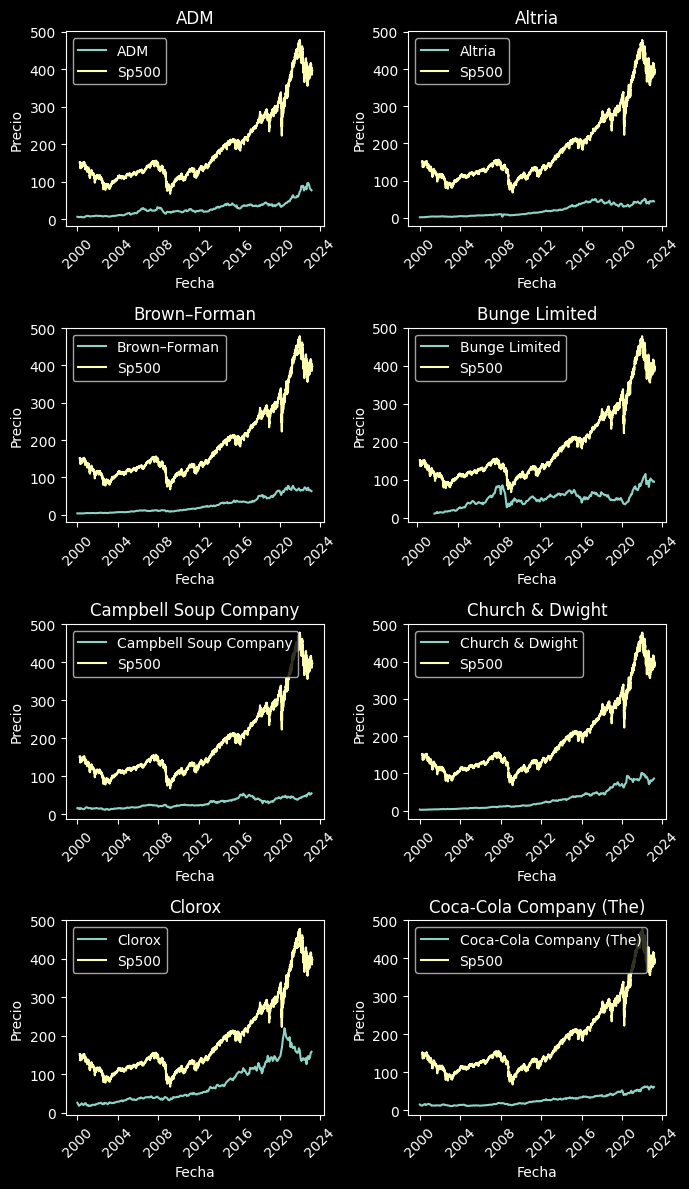

In [126]:
fig, ax = plt.subplots(4, 2, figsize=(7,12))

z=0
for i in range(4):
    for j in range(2):
   
        tk = sector1_companies_tk[z]
        nm = sector1_companies_nm[tk]    
        sns.lineplot(x="Date", y=tk, data=df,ax=ax[i,j], label=nm)
        sns.lineplot(x="Date", y="Close", data=spy_close, ax=ax[i,j], label="Sp500")
        ax[i,j].set(title=nm, xlabel="Fecha", ylabel="Precio")
        ax[i,j].tick_params(axis='x', labelrotation=45)
        z += 1

plt.tight_layout()
plt.show()

    

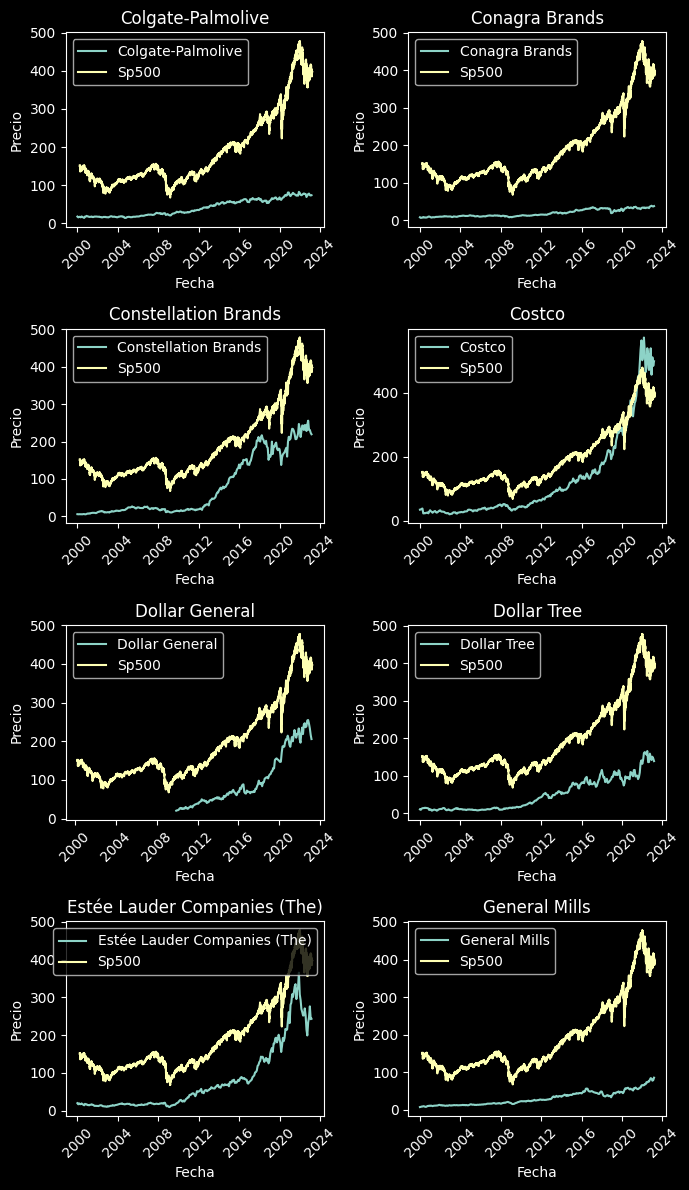

In [127]:
fig, ax = plt.subplots(4, 2, figsize=(7,12))

z=8
for i in range(4):
    for j in range(2):
   
        tk = sector1_companies_tk[z]
        nm = sector1_companies_nm[tk]    
        sns.lineplot(x="Date", y=tk, data=df,ax=ax[i,j], label=nm)
        sns.lineplot(x="Date", y="Close", data=spy_close, ax=ax[i,j], label="Sp500")
        ax[i,j].set(title=nm, xlabel="Fecha", ylabel="Precio")
        ax[i,j].tick_params(axis='x', labelrotation=45)
        z += 1

plt.tight_layout()
plt.show()


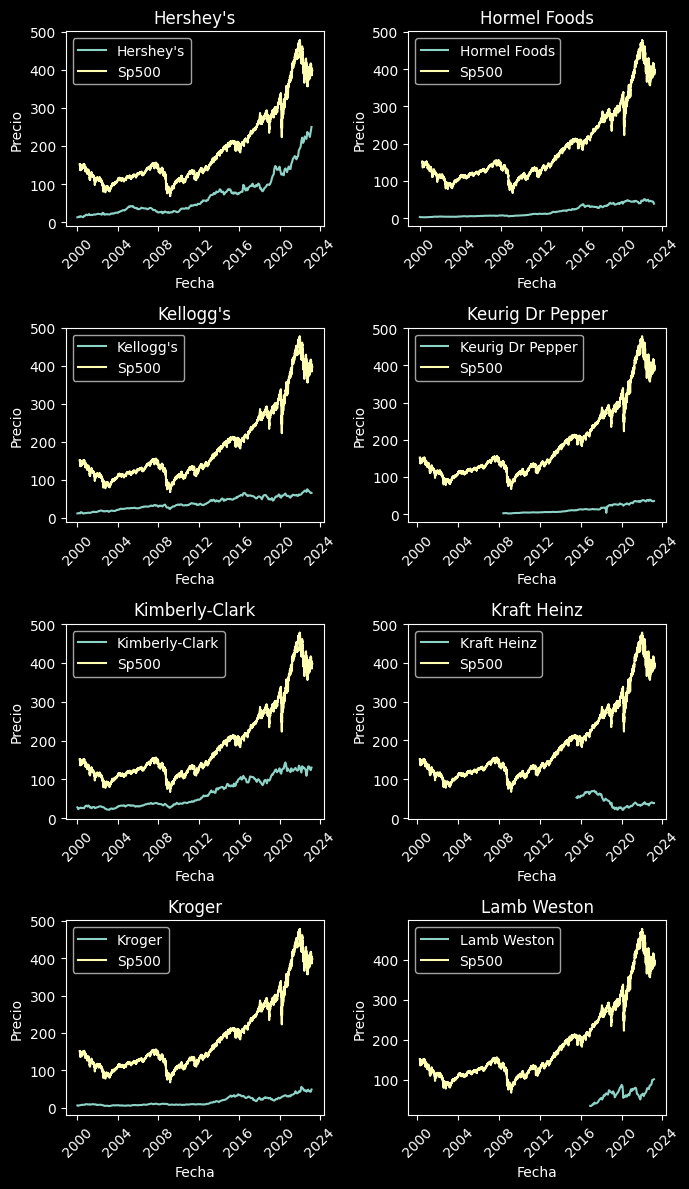

In [128]:
fig, ax = plt.subplots(4, 2, figsize=(7,12))

z=16
for i in range(4):
    for j in range(2):
   
        tk = sector1_companies_tk[z]
        nm = sector1_companies_nm[tk]    
        sns.lineplot(x="Date", y=tk, data=df,ax=ax[i,j], label=nm)
        sns.lineplot(x="Date", y="Close", data=spy_close, ax=ax[i,j], label="Sp500")
        ax[i,j].set(title=nm, xlabel="Fecha", ylabel="Precio")
        ax[i,j].tick_params(axis='x', labelrotation=45)
        z += 1

plt.tight_layout()
plt.show()


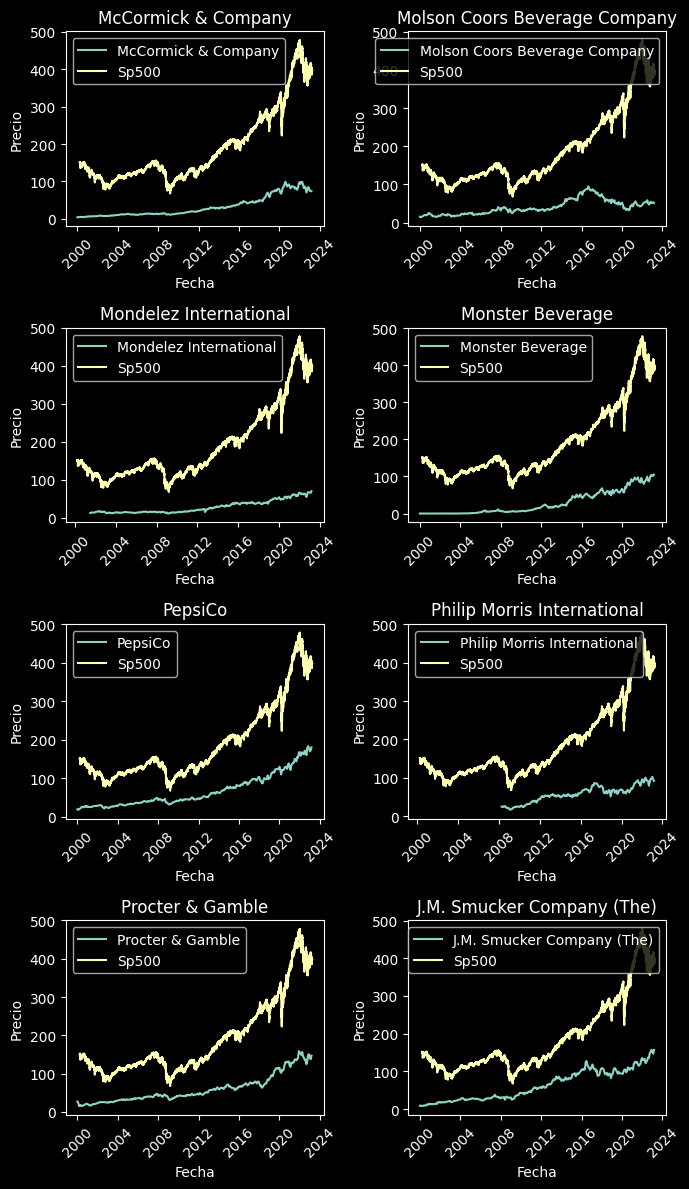

In [129]:
fig, ax = plt.subplots(4, 2, figsize=(7,12))

z=24
for i in range(4):
    for j in range(2):
   
        tk = sector1_companies_tk[z]
        nm = sector1_companies_nm[tk]    
        sns.lineplot(x="Date", y=tk, data=df,ax=ax[i,j], label=nm)
        sns.lineplot(x="Date", y="Close", data=spy_close, ax=ax[i,j], label="Sp500")
        ax[i,j].set(title=nm, xlabel="Fecha", ylabel="Precio")
        ax[i,j].tick_params(axis='x', labelrotation=45)
        z += 1

plt.tight_layout()
plt.show()


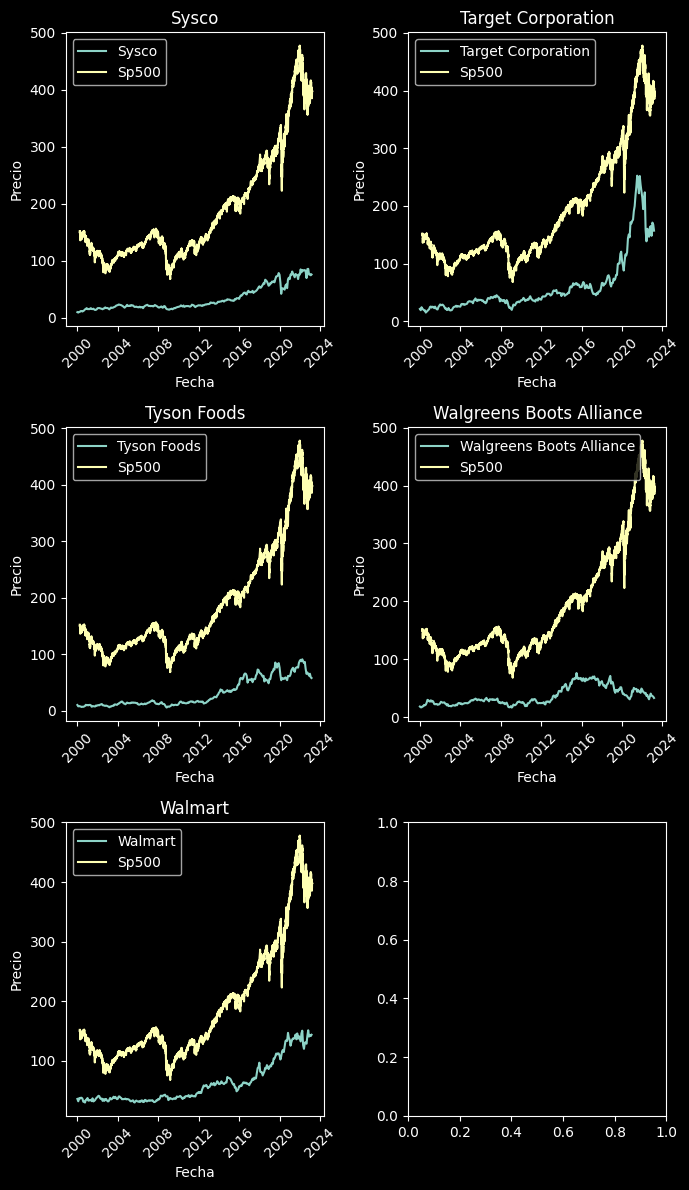

In [131]:
fig, ax = plt.subplots(3, 2, figsize=(7,12))

z=32
for i in range(3):
    for j in range(2):
        if z==37: break
        tk = sector1_companies_tk[z]
        nm = sector1_companies_nm[tk]    
        sns.lineplot(x="Date", y=tk, data=df,ax=ax[i,j], label=nm)
        sns.lineplot(x="Date", y="Close", data=spy_close, ax=ax[i,j], label="Sp500")
        ax[i,j].set(title=nm, xlabel="Fecha", ylabel="Precio")
        ax[i,j].tick_params(axis='x', labelrotation=45)
        z += 1

plt.tight_layout()
plt.show()



---
### Seleccionamos algunas de estas

---

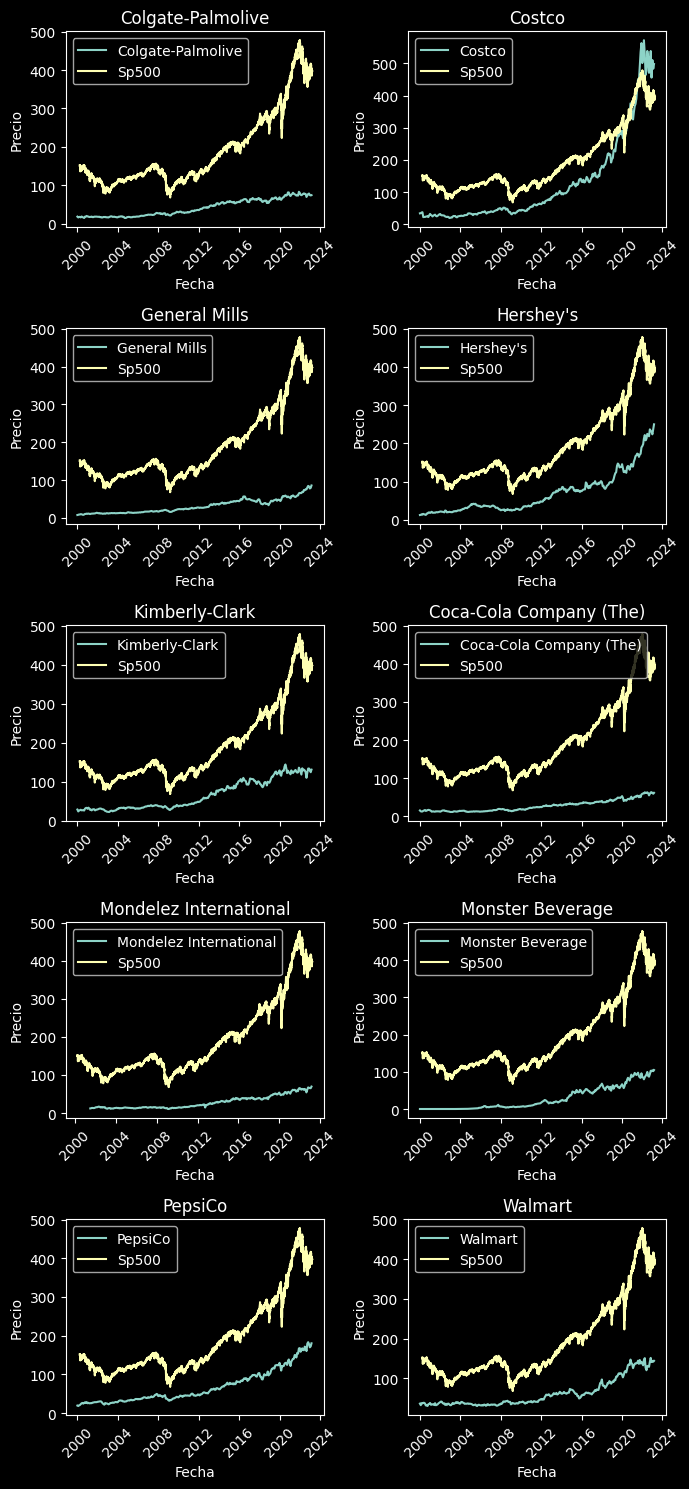

In [132]:
pre_selected = ["CL", "COST", "GIS", "HSY", "KMB", "KO", "MDLZ", "MNST", "PEP","WMT"]

fig, ax = plt.subplots(5, 2, figsize=(7,15))

z=0
for i in range(5):
    for j in range(2):
        if z==37: break
        tk = pre_selected[z]
        nm = sector1_companies_nm[tk]    
        sns.lineplot(x="Date", y=tk, data=df,ax=ax[i,j], label=nm)
        sns.lineplot(x="Date", y="Close", data=spy_close, ax=ax[i,j], label="Sp500")
        ax[i,j].set(title=nm, xlabel="Fecha", ylabel="Precio")
        ax[i,j].tick_params(axis='x', labelrotation=45)
        z += 1

plt.tight_layout()
plt.show()


---
### Nos centramos en los ultimos 5 años aproximadamente

#### Descargo los datos con intervalo por dias

---

In [143]:

data_preselected = {}
for symbol in pre_selected:
    data_preselected[symbol] = yf.download(symbol, start="2018-03-27", end=dt.datetime.now(), interval="1d")["Adj Close"]

df_selected_5_y = pd.DataFrame(data_preselected)
df_selected_5_y.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,CL,COST,GIS,HSY,KMB,KO,MDLZ,MNST,PEP,WMT
Date,,,,,,,,,,
2018-03-27,61.430542,171.133392,38.006786,87.853539,90.922112,36.625538,36.596043,56.250000,93.092308,78.676491
2018-03-28,62.778332,171.563232,37.201511,88.266815,92.579865,36.992737,36.506104,56.240002,94.424179,80.249084
2018-03-29,63.558624,176.066971,37.797085,88.904648,93.146530,37.086674,37.531403,57.209999,94.398232,81.346283
2018-04-02,62.201973,170.759674,36.983429,87.179764,90.575340,36.437675,36.614025,55.619999,92.582054,78.219353
2018-04-03,62.911335,170.628860,37.159573,87.871513,91.243515,37.043976,37.036743,55.730000,93.567970,79.362244


In [151]:
df_5 = df_selected_5_y.copy()
df_5.reset_index(inplace=True)
df_5.head()

,Date,CL,COST,GIS,HSY,KMB,KO,MDLZ,MNST,PEP,WMT
0,2018-03-27,61.430542,171.133392,38.006786,87.853539,90.922112,36.625538,36.596043,56.250000,93.092308,78.676491
1,2018-03-28,62.778332,171.563232,37.201511,88.266815,92.579865,36.992737,36.506104,56.240002,94.424179,80.249084
2,2018-03-29,63.558624,176.066971,37.797085,88.904648,93.146530,37.086674,37.531403,57.209999,94.398232,81.346283
3,2018-04-02,62.201973,170.759674,36.983429,87.179764,90.575340,36.437675,36.614025,55.619999,92.582054,78.219353
4,2018-04-03,62.911335,170.628860,37.159573,87.871513,91.243515,37.043976,37.036743,55.730000,93.567970,79.362244


In [150]:
spy_close_5 = yf.download("SPY", start="2018-03-27", end=dt.datetime.now(), interval="1d")
spy_close_5.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-27,266.170013,266.769989,258.839996,260.600006,239.310425,129941400
2018-03-28,260.750000,262.640015,258.579987,259.829987,238.603348,146452300
2018-03-29,261.119995,265.260010,259.839996,263.149994,241.652161,111601600
2018-04-02,262.549988,263.130005,254.669998,257.470001,236.436142,186286300
2018-04-03,258.869995,261.309998,256.839996,260.769989,239.466553,119956900


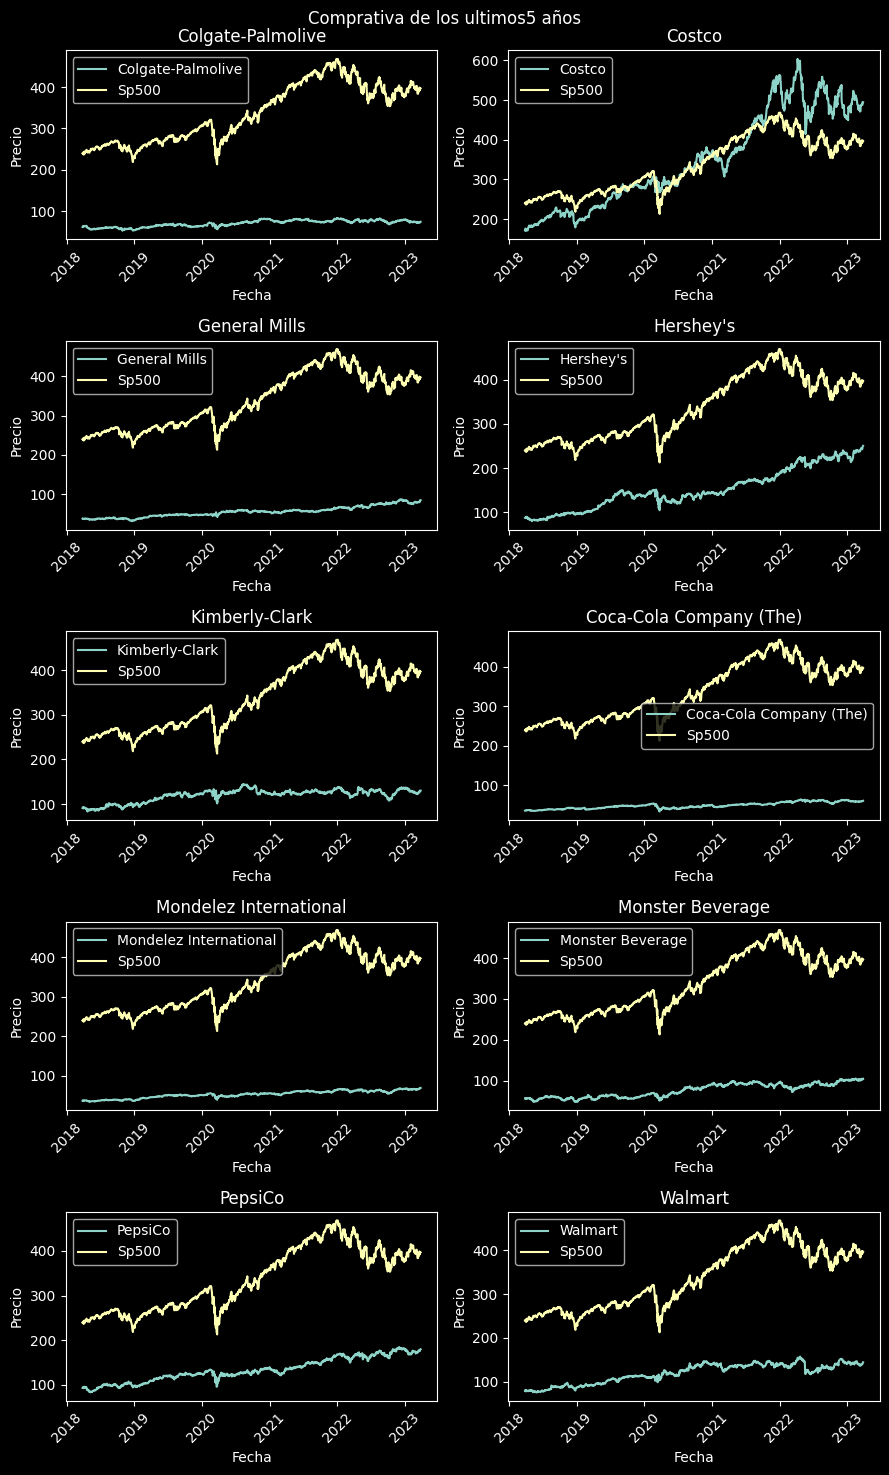

In [152]:
fig, ax = plt.subplots(5, 2, figsize=(9,15))

z=0
for i in range(5):
    for j in range(2):
        if z==37: break
        tk = pre_selected[z]
        nm = sector1_companies_nm[tk]    
        sns.lineplot(x="Date", y=tk, data=df_5,ax=ax[i,j], label=nm)
        sns.lineplot(x="Date", y="Adj Close", data=spy_close_5, ax=ax[i,j], label="Sp500")
        ax[i,j].set(title=nm, xlabel="Fecha", ylabel="Precio")
        ax[i,j].tick_params(axis='x', labelrotation=45)
        plt.suptitle("Comprativa de los ultimos5 años")
        z += 1

plt.tight_layout()
plt.show()

---
### Sector 2: Utilities
Lista de empresas

> PD: No vamos a analizar este sector.


---

In [ ]:
print("----------------------------------------------------- ")
print("Sector: ", sector2)
print("----------------------------------------------------- ")
for s in sector2_companies_tk:
    print(s, " --> ", sector2_companies_nm[s])
print("----------------------------------------------------- ")